In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.pyplot as plt
import warnings
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
pd.set_option('display.max_columns',None)
warnings.filterwarnings("ignore")

In [3]:
X = pd.read_csv('../dados_processados/cursos-pos-processamento.csv',sep=';')

In [4]:
X.shape

(3205, 37)

In [5]:
X_to_train = X.drop(['no_curso','co_curso'],axis=1)

In [6]:
linkage_matrix = linkage(X_to_train, method='ward')

In [7]:
lista = list(X.no_curso)

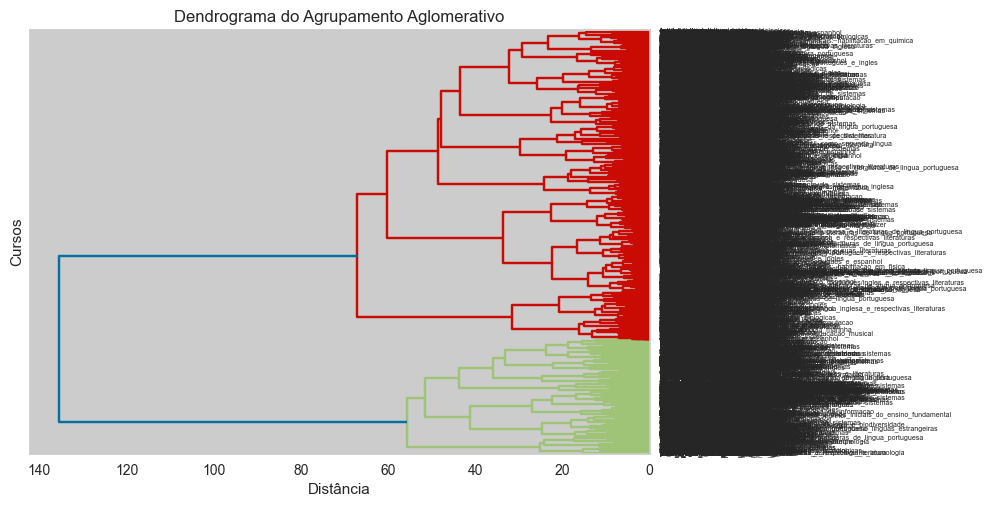

In [8]:
dendrogram(linkage_matrix, labels=lista, orientation='left')
plt.title("Dendrograma do Agrupamento Aglomerativo")
plt.ylabel("Cursos")
plt.xlabel("Distância")
plt.show()

In [9]:
agglomerative = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglomerative.fit(X_to_train)

AgglomerativeClustering()

In [10]:
X_to_train['label'] = agglomerative.labels_

In [11]:
X_to_train['no_curso'] = X['no_curso']

In [12]:
X_to_train.label.value_counts()

label
0    2338
1     867
Name: count, dtype: int64

In [13]:
for i in range(0, 2):
    cursos_cluster_i = list(X_to_train.query('label == @i')['no_curso'])
    print('Cluster', i+1, '-', len(cursos_cluster_i), 'cursos')
    
    for curso in cursos_cluster_i:
        print(curso)
    
    print()

Cluster 1 - 2338 cursos
brasilia_licenciatura_artes_visuais
brasilia_licenciatura_artes_visuais
brasilia_bacharelado_ciencias_sociais
brasilia_bacharelado_ciencias_sociais_-_antropologia
brasilia_bacharelado_ciencias_sociais_-_sociologia
brasilia_bacharelado_design_-_programacao_visual
brasilia_bacharelado_design_-_projeto_do_produto
brasilia_bacharelado_filosofia
brasilia_licenciatura_filosofia
brasilia_licenciatura_filosofia
brasilia_licenciatura_fisica
brasilia_licenciatura_geografia
brasilia_bacharelado_geografia
brasilia_bacharelado_historia
brasilia_licenciatura_letras_-_lingua_inglesa_e_respectiva_literatura
brasilia_licenciatura_letras_-_lingua_portuguesa_e_respectiva_literatura
brasilia_licenciatura_letras_-_portugues_do_brasil_como_segunda_lingua
brasilia_licenciatura_matematica
brasilia_licenciatura_matematica
brasilia_licenciatura_musica
brasilia_licenciatura_musica
brasilia_licenciatura_quimica
brasilia_bacharelado_quimica
brasilia_bacharelado_ciencia_da_computacao
brasili